In [21]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Carregando a base de dados
train_data = pd.read_csv('Train_Data.csv')
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [5]:
# Verificando o shape do dataset
train_data.shape

(3630, 7)

In [6]:
# Verificando se existem dados faltantes
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [8]:
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


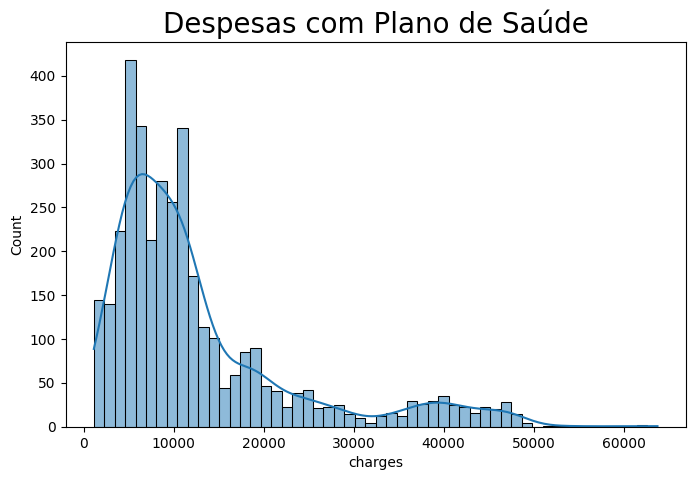

In [22]:
# Histograma de encargos de seguro médico:
plt.figure(figsize= (8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

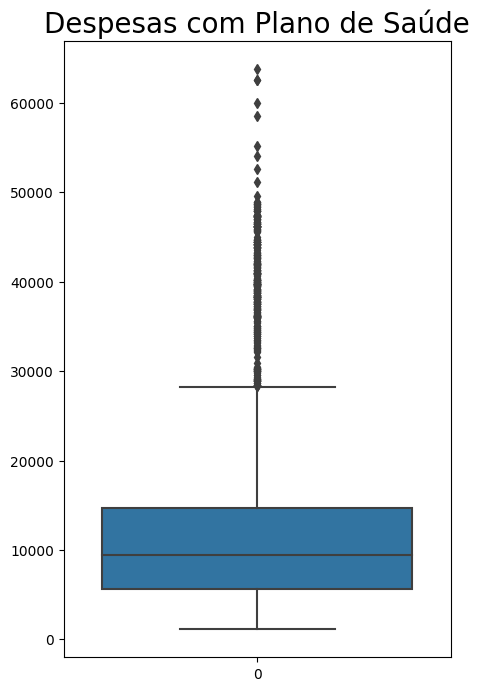

In [26]:
# Verificando outliers com Boxplot de encargos de seguro médico:

plt.figure(figsize= (5,8))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=20)
plt.show()

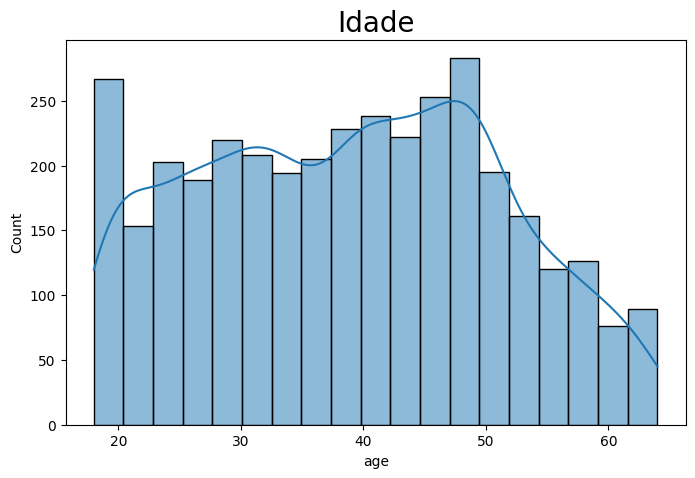

In [35]:
# Histograma da idade dos pacientes:
plt.figure(figsize= (8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

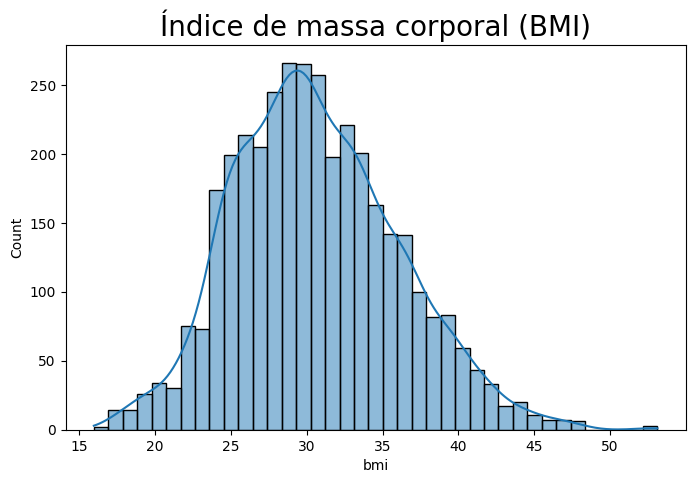

In [38]:
# Histograma do índice de massa corporal
plt.figure(figsize= (8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Índice de massa corporal (BMI)', fontsize=20)
plt.show()

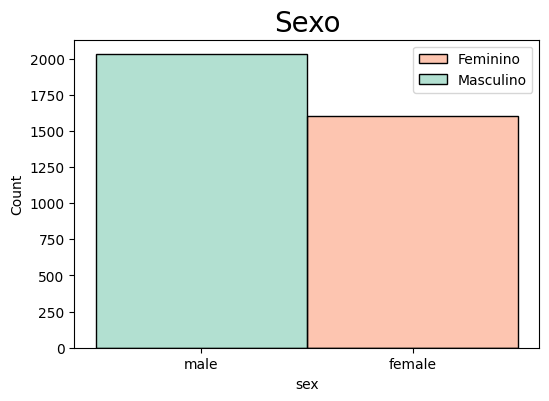

In [58]:
# Visualizando histograma de generos:
sns.set_palette("Set2")
plt.figure(figsize=(6, 4))
sns.histplot(data=train_data, x='sex', hue='sex')
plt.title('Sexo', fontsize=20)
plt.legend(title=None, labels=['Feminino', 'Masculino'])
plt.show()

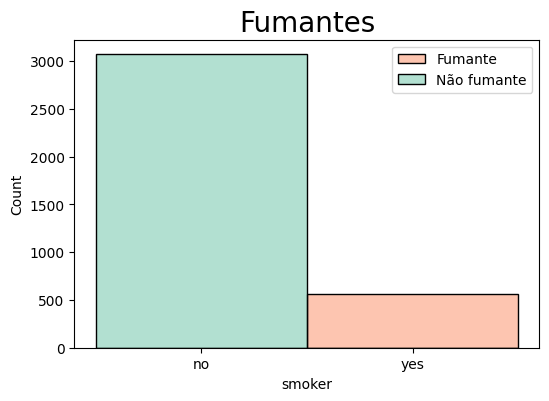

In [60]:
# Visualizando histograma de fumantes:

sns.set_palette("Set2")
plt.figure(figsize=(6, 4))
sns.histplot(data=train_data, x='smoker', hue='smoker')
plt.title('Fumantes', fontsize=20)
plt.legend(title= None, labels=['Fumante', 'Não fumante'])
plt.show()

In [64]:
# Arredondanr a Variável AGE
train_data['age'] = round(train_data['age'])
train_data['age'].head(2)

0    21.0
1    37.0
Name: age, dtype: float64

In [69]:
# Transformando varáveis em numéricas
train_data = pd.get_dummies(train_data, drop_first=True)
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [71]:
# Verificando as colunas do dataset
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [72]:
# Escolhendo só as variáveis que vou usar
train_data = train_data[['age', 'bmi', 'children', 'region_southeast', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'charges']]
train_data.head(2)

,age,bmi,children,region_southeast,sex_male,smoker_yes,region_northwest,region_southeast,charges
0,21.0,25.745000,2,0,1,0,0,0,3279.868550
1,37.0,25.744165,3,1,0,1,0,1,21454.494239


In [74]:
# Separando os dados
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [75]:
X.head(2)

,age,bmi,children,region_southeast,sex_male,smoker_yes,region_northwest,region_southeast
0,21.0,25.745000,2,0,1,0,0,0
1,37.0,25.744165,3,1,0,1,0,1


In [77]:
y.head(2)

0     3279.868550
1    21454.494239
Name: charges, dtype: float64

In [79]:
# Separando dados de treino e teste:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [80]:
# Importando métricas de avaliação:
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
# Arvore de regressão:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor ()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# PrediPrediçãoction:
y_pred = RandomForestRegressor.predict(X_test)

# pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9145655709588907
10486332.774863621


In [ ]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))